In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

from imblearn.over_sampling import RandomOverSampler

In [2]:
# Mount Google Drive when using Google Colab
# Do not run if not using Ćolab
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#Comment-uncomment as necessary
# Read dataset from mounted Drive
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IDS_Project/BRFSS2015_cleaned_v2.csv")
# Read dataset from mounted folder
df = pd.read_csv("./datasets/BRFSS2015_cleaned_v2.csv")

## No Sampling

In [4]:
# Get X and y from data
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [5]:
# Separate 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [6]:
# Decision Tree
model_tree = DecisionTreeClassifier()
model_tree = model_tree.fit(X_train, y_train)

tree_pred = model_tree.predict(X_val)

tree_fscore = f1_score(y_val, tree_pred)

In [7]:
# Random forest
model_randomForest = RandomForestClassifier()
model_randomForest = model_randomForest.fit(X_train, y_train)

randomForest_pred = model_randomForest.predict(X_val)

randomForest_fscore = f1_score(y_val, randomForest_pred)

In [8]:
# K Neighbors
model_KNN = KNeighborsClassifier()
model_KNN = model_KNN.fit(X_train, y_train)

KNN_pred = model_KNN.predict(X_val)

KNN_fscore = f1_score(y_val, KNN_pred)

In [9]:
# In a loop to find best K on validation set
#
#best_i = 1
#best_model = None
#best_fscore = 0
#
# Maximum for KNN based on amount of number of entries with heart disease
#for i in range(1,2*23218 + 1):
#    model_KNN = KNeighborsClassifier(i)
#    model_KNN = model_KNN.fit(X_train, y_train)
#
#    KNN_pred = model_KNN.predict(X_val)
#
#    KNN_fscore = f1_score(y_val, KNN_pred)
#
#    if KNN_fscore > best_fscore:
#        best_i = i
#        best_fscore = KNN_fscore
#        best_model = model_KNN
#
#    print(i)
#
#model_KNN = best_model
#KNN_fscore = best_fscore

In [10]:
#GaussianNB
model_GaussianNB = GaussianNB()
model_GaussianNB = model_GaussianNB.fit(X_train, y_train)

GaussianNB_pred = model_GaussianNB.predict(X_val)

GaussianNB_fscore = f1_score(y_val, GaussianNB_pred)

In [11]:
# AdaBoost
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost = model_AdaBoost.fit(X_train, y_train)

AdaBoost_pred = model_AdaBoost.predict(X_val)

AdaBoost_pred = f1_score(y_val, AdaBoost_pred)

In [12]:
print("F-scores on non-sampled data")
print("\tDecision tree:", tree_fscore)
print("\tRandom forest:", randomForest_fscore)
print("\tK Neighbors:  ", KNN_fscore)
print("\tGaussianNB:   ", GaussianNB_fscore)
print("\tAda Boost:    ", AdaBoost_pred)

F-scores on non-sampled data
	Decision tree: 0.2520150456743686
	Random forest: 0.17383133662203432
	K Neighbors:   0.14813157305884983
	GaussianNB:    0.3648919135308246
	Ada Boost:     0.2306997742663657


# Undersampling

In [13]:
# Separate into positive and negative cases
# Keep as many negatice cases as positive cases
positive_cases = df[df['HeartDisease'] == 1]
negative_sample = df[df['HeartDisease'] == 0].sample(n = len(positive_cases), random_state=0)

undersampled = pd.concat([positive_cases, negative_sample])
undersampled.sort_index(inplace=True)

# split data into X and y
X = undersampled.drop('HeartDisease', axis=1)
y = undersampled['HeartDisease']

# Separate into test, train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [14]:
# Decision Tree
model_tree = DecisionTreeClassifier()
model_tree = model_tree.fit(X_train, y_train)

tree_pred = model_tree.predict(X_val)

tree_fscore = f1_score(y_val, tree_pred)

In [15]:
# Random forest
model_randomForest = RandomForestClassifier()
model_randomForest = model_randomForest.fit(X_train, y_train)

randomForest_pred = model_randomForest.predict(X_val)

randomForest_fscore = f1_score(y_val, randomForest_pred)

In [16]:
# K Neighbors
model_KNN = KNeighborsClassifier()
model_KNN = model_KNN.fit(X_train, y_train)

KNN_pred = model_KNN.predict(X_val)

KNN_fscore = f1_score(y_val, KNN_pred)

In [17]:
#GaussianNB
model_GaussianNB = GaussianNB()
model_GaussianNB = model_GaussianNB.fit(X_train, y_train)

GaussianNB_pred = model_GaussianNB.predict(X_val)

GaussianNB_fscore = f1_score(y_val, GaussianNB_pred)

In [18]:
# AdaBoost
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost = model_AdaBoost.fit(X_train, y_train)

AdaBoost_pred = model_AdaBoost.predict(X_val)

AdaBoost_pred = f1_score(y_val, AdaBoost_pred)

In [19]:
print("F-scores on undersampled data")
print("\tDecision tree:", tree_fscore)
print("\tRandom forest:", randomForest_fscore)
print("\tK Neighbors:  ", KNN_fscore)
print("\tGaussianNB:   ", GaussianNB_fscore)
print("\tAda Boost:    ", AdaBoost_pred)

F-scores on undersampled data
	Decision tree: 0.6742824503784092
	Random forest: 0.7742639040348963
	K Neighbors:   0.7165596202178162
	GaussianNB:    0.7042424242424242
	Ada Boost:     0.7706703910614525


# Oversampling

In [20]:
# Get X and y from data
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Oversample
ros = RandomOverSampler(random_state=0)
X_oversampled, y_oversampled = ros.fit_resample(X, y)

# Separate into test, train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [21]:
# Decision Tree
model_tree = DecisionTreeClassifier()
model_tree = model_tree.fit(X_train, y_train)

tree_pred = model_tree.predict(X_val)

tree_fscore = f1_score(y_val, tree_pred)

In [22]:
# Random forest
model_randomForest = RandomForestClassifier()
model_randomForest = model_randomForest.fit(X_train, y_train)

randomForest_pred = model_randomForest.predict(X_val)

randomForest_fscore = f1_score(y_val, randomForest_pred)

In [23]:
# K Neighbors
model_KNN = KNeighborsClassifier()
model_KNN = model_KNN.fit(X_train, y_train)

KNN_pred = model_KNN.predict(X_val)

KNN_fscore = f1_score(y_val, KNN_pred)

In [24]:
#GaussianNB
model_GaussianNB = GaussianNB()
model_GaussianNB = model_GaussianNB.fit(X_train, y_train)

GaussianNB_pred = model_GaussianNB.predict(X_val)

GaussianNB_fscore = f1_score(y_val, GaussianNB_pred)

In [25]:
# AdaBoost
model_AdaBoost = AdaBoostClassifier()
model_AdaBoost = model_AdaBoost.fit(X_train, y_train)

AdaBoost_pred = model_AdaBoost.predict(X_val)

AdaBoost_pred = f1_score(y_val, AdaBoost_pred)

In [26]:
print("F-scores on oversampled data")
print("\tDecision tree:", tree_fscore)
print("\tRandom forest:", randomForest_fscore)
print("\tK Neighbors:  ", KNN_fscore)
print("\tGaussianNB:   ", GaussianNB_fscore)
print("\tAda Boost:    ", AdaBoost_pred)

F-scores on oversampled data
	Decision tree: 0.948783556454007
	Random forest: 0.970267262188688
	K Neighbors:   0.884664502740382
	GaussianNB:    0.7006446286240513
	Ada Boost:     0.7728920594082563


# The best model

The best model turned out to be Random Forest classifier based on oversampled data

The next section is about determining what features this model uses for classification and further analysis on test data (not validation data).

In [27]:
# Using the oversampled Random Forest Classifier
y_pred = model_randomForest.predict(X_test)

# Getting the metrics
metrics = precision_recall_fscore_support(y_test, y_pred, average="binary")

# Printing the metrics
print("Using the oversampled Random Forest Classifier")
print("\tPrecision:", metrics[0])
print("\tAccuracy: ", metrics[1])
print("\tF-score:  ", metrics[2])

Using the oversampled Random Forest Classifier
	Precision: 0.9453228116487404
	Accuracy:  0.9985760901809552
	F-score:   0.9712200118293685


In [28]:
features_with_importances = list(zip(X.columns, model_randomForest.feature_importances_))
features_with_importances.sort(key = lambda x: x[1], reverse = True)

In [29]:
print("Features with their importance in the model")
for label, importance in features_with_importances:
    print("\t" + label + ":", importance)

Features with their importance in the model
	Age: 0.14655687385803504
	BMI: 0.1396051912619271
	GenHlth: 0.0902527111347042
	PhysHlth: 0.06587913540594782
	HighBP: 0.06243563594160124
	Income: 0.05562965366057185
	Education: 0.052248269768001655
	PhysActivity: 0.049907998087105714
	MentHlth: 0.04723236855947088
	HighChol: 0.04350905651064045
	Smoker: 0.0376239897013417
	DiffWalk: 0.03459904454031395
	Diabetes: 0.02965579510878636
	Sex: 0.027054714125151324
	LastCheckup: 0.025497354140303432
	Fruits: 0.025061077343789224
	Stroke: 0.022185412075322947
	Veggies: 0.019886261030350023
	NoDocBcCost: 0.010623398005586508
	HvyDrinking: 0.008230485971128958
	Healthcare: 0.006325573769919772


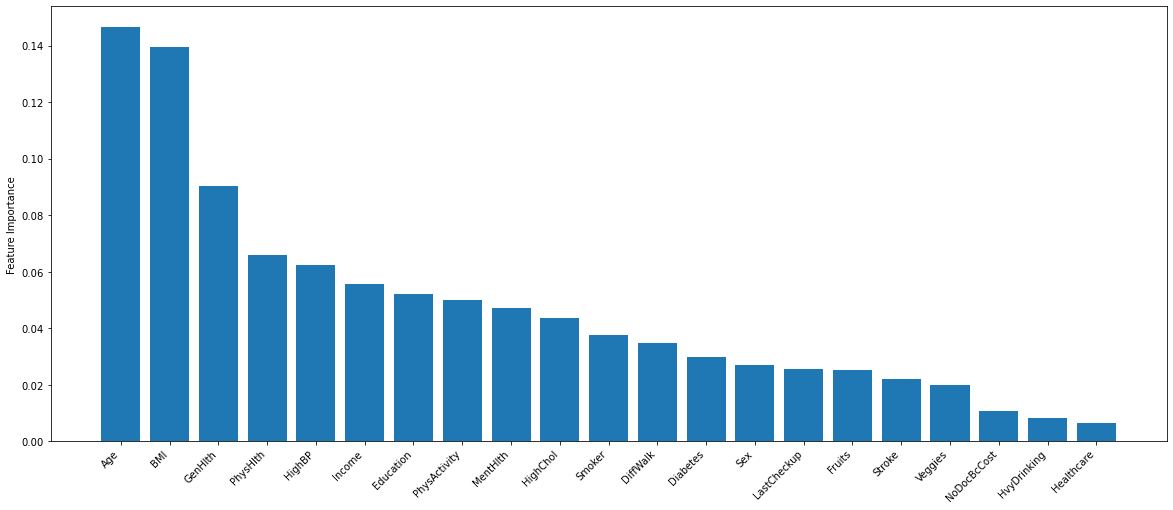

In [30]:
features = list(zip(*features_with_importances))[0]
scores = list(zip(*features_with_importances))[1]

plt.rcParams['figure.figsize'] = [20, 8]

plt.bar(features, scores)
plt.xticks(rotation=45, ha="right")
plt.ylabel('Feature Importance')
plt.show()

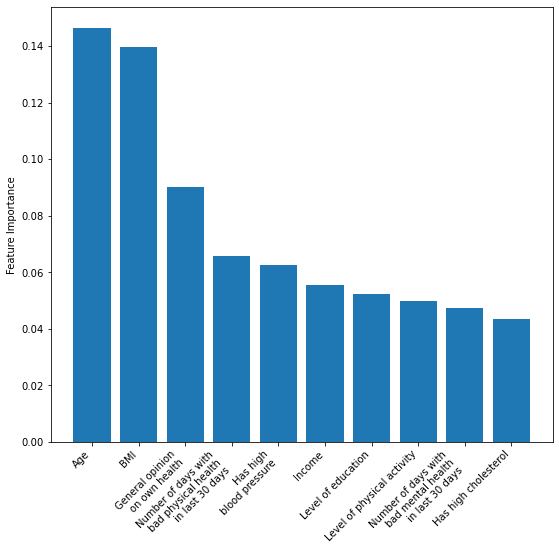

In [31]:
features = list(zip(*features_with_importances[:10]))[0]
scores = list(zip(*features_with_importances[:10]))[1]

replacements = {'GenHlth':'General opinion\non own health', 'PhysHlth':'Number of days with\nbad physical health\nin last 30 days', 'HighBP':'Has high\nblood pressure', 'Education':'Level of education', 'PhysActivity':'Level of physical activity', 'HighChol':'Has high cholesterol', 'MentHlth':'Number of days with\nbad mental health\nin last 30 days'}

features = [replacements.get(n, n) for n in features]

plt.rcParams['figure.figsize'] = [9, 8]

plt.bar(features, scores)
plt.xticks(rotation=45, ha="right")
plt.ylabel('Feature Importance')
plt.show()